# EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION ON FUTURE TWEET ANALYSIS 


PROJECT DONE BY MAUZUM SHAMIL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import glob

# Get a list of file paths for all CSV files in the directory
file_paths = glob.glob(r'C:\Users\dell\Desktop\FUTURE TWEET TEXT ANALYSIS\*.csv')

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file path and read the CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into one DataFrame
concatenated_df = pd.concat(dfs, ignore_index=True)  # Set ignore_index=True to reset index after concatenation

# Display the concatenated DataFrame
concatenated_df.head()  # Display the first few rows of the concatenated DataFrame


,Unnamed: 0,0,1,2,3
0,0,@AndiKaraboutis,2023-02-06 20:57:28+00:00,https://twitter.com/AndiKaraboutis/status/1622...,The coasts and a tad of Midwest still goi g st...
1,1,@AndiKaraboutis,2022-12-27 19:17:57+00:00,https://twitter.com/AndiKaraboutis/status/1607...,@nyike @rwang0 @jayferro @itlinchpin @mcdavis1...
2,2,@AndiKaraboutis,2022-09-13 23:01:09+00:00,https://twitter.com/AndiKaraboutis/status/1569...,RIP ma’am… https://t.co/Qf1zU5tD6h
3,3,@AndiKaraboutis,2022-09-06 21:32:22+00:00,https://twitter.com/AndiKaraboutis/status/1567...,Thrilled to be appointed to the board of such ...
4,4,@AndiKaraboutis,2022-06-20 20:15:14+00:00,https://twitter.com/AndiKaraboutis/status/1538...,The future is Digital.


In [3]:
df = concatenated_df.reset_index()

In [5]:
df = concatenated_df.sample(frac=1)

In [6]:
df

,Unnamed: 0,0,1,2,3
2967,799,@elonmusk,2023-01-08 22:13:17+00:00,https://twitter.com/elonmusk/status/1612210860...,@TrungTPhan 🔥🤣
320,211,@AndrewinContact,2022-07-18 11:57:02+00:00,https://twitter.com/AndrewinContact/status/154...,Many Ways #ArtificialIntelligence Is Used\n\nI...
8491,6323,@elonmusk,2021-11-25 09:14:24+00:00,https://twitter.com/elonmusk/status/1463798210...,@BLKMDL3 @Tesla Sorry it took so long
2538,370,@elonmusk,2023-01-31 04:43:31+00:00,https://twitter.com/elonmusk/status/1620281601...,@teslaownersSV Exactly
4274,2106,@elonmusk,2022-11-23 07:19:17+00:00,https://twitter.com/elonmusk/status/1595316038...,@StephenKing Oh hi lol
...,...,...,...,...,...
11135,5,@future,2022-09-02 15:05:24+00:00,https://twitter.com/future/status/156571753473...,For companies that have gone or are planning t...
7516,5348,@elonmusk,2022-03-22 01:15:35+00:00,https://twitter.com/elonmusk/status/1506077094...,@ashleevance 🐍 🐓 🤔
6726,4558,@elonmusk,2022-05-26 23:11:31+00:00,https://twitter.com/elonmusk/status/1529963471...,"@davidgokhshtein Dogecoin Trillionaire, the Mo..."
9695,7527,@elonmusk,2021-07-13 02:33:53+00:00,https://twitter.com/elonmusk/status/1414775056...,@dogeofficialceo 🤣


In [7]:
df = df.drop(['Unnamed: 0', '0', '1', '2'],axis=1)

In [9]:
df.reset_index(inplace=True)

In [11]:
df = df.drop('index',axis=1)

In [12]:
df

,3
0,@TrungTPhan 🔥🤣
1,Many Ways #ArtificialIntelligence Is Used\n\nI...
2,@BLKMDL3 @Tesla Sorry it took so long
3,@teslaownersSV Exactly
4,@StephenKing Oh hi lol
...,...
11526,For companies that have gone or are planning t...
11527,@ashleevance 🐍 🐓 🤔
11528,"@davidgokhshtein Dogecoin Trillionaire, the Mo..."
11529,@dogeofficialceo 🤣


In [13]:
df.rename(columns={'3':'Text'},inplace=True)

In [17]:
import os
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def clean(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,!]","",text)
    text = re.sub('\n', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)

In [19]:
df['Text'] = df['Text'].apply(clean)

# create a class of the sentiment column

In [20]:
from textblob import TextBlob
import pandas as pd

# Assuming 'tweets' is your DataFrame containing the tweets
def analyze_sentiment(df):
    analysis = TextBlob(df)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each tweet
df['class'] = df['Text'].apply(analyze_sentiment)


In [21]:
df

,Text,class
0,trungtphan,neutral
1,many ways artificialintelligence used info via...,positive
2,blkmdl tesla sorry took long,negative
3,teslaownerssv exactly,positive
4,stephenking oh hi lol,positive
...,...,...
11526,companies gone planning go hybrid remote model...,negative
11527,ashleevance,neutral
11528,davidgokhshtein dogecoin trillionaire movie,neutral
11529,dogeofficialceo,neutral


(array([5041.,    0.,    0.,    0.,    0., 5326.,    0.,    0.,    0.,
        1164.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

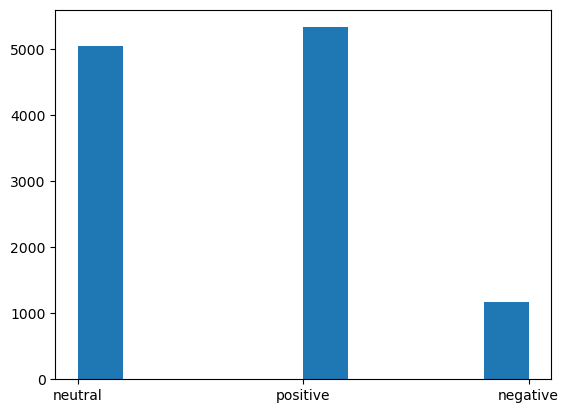

In [22]:
plt.hist(df['class'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11531 entries, 0 to 11530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11531 non-null  object
 1   class   11531 non-null  object
dtypes: object(2)
memory usage: 180.3+ KB


In [24]:
df.columns

Index(['Text', 'class'], dtype='object')

In [25]:
df.dtypes

Text     object
class    object
dtype: object

In [26]:
df.describe()

,Text,class
count,11531,11531
unique,11019,3
top,billym k,positive
freq,73,5326


In [28]:
df.isna().sum()

Text     0
class    0
dtype: int64

In [30]:
df.nunique()

Text     11019
class        3
dtype: int64

In [31]:
# data visualization

from wordcloud import WordCloud

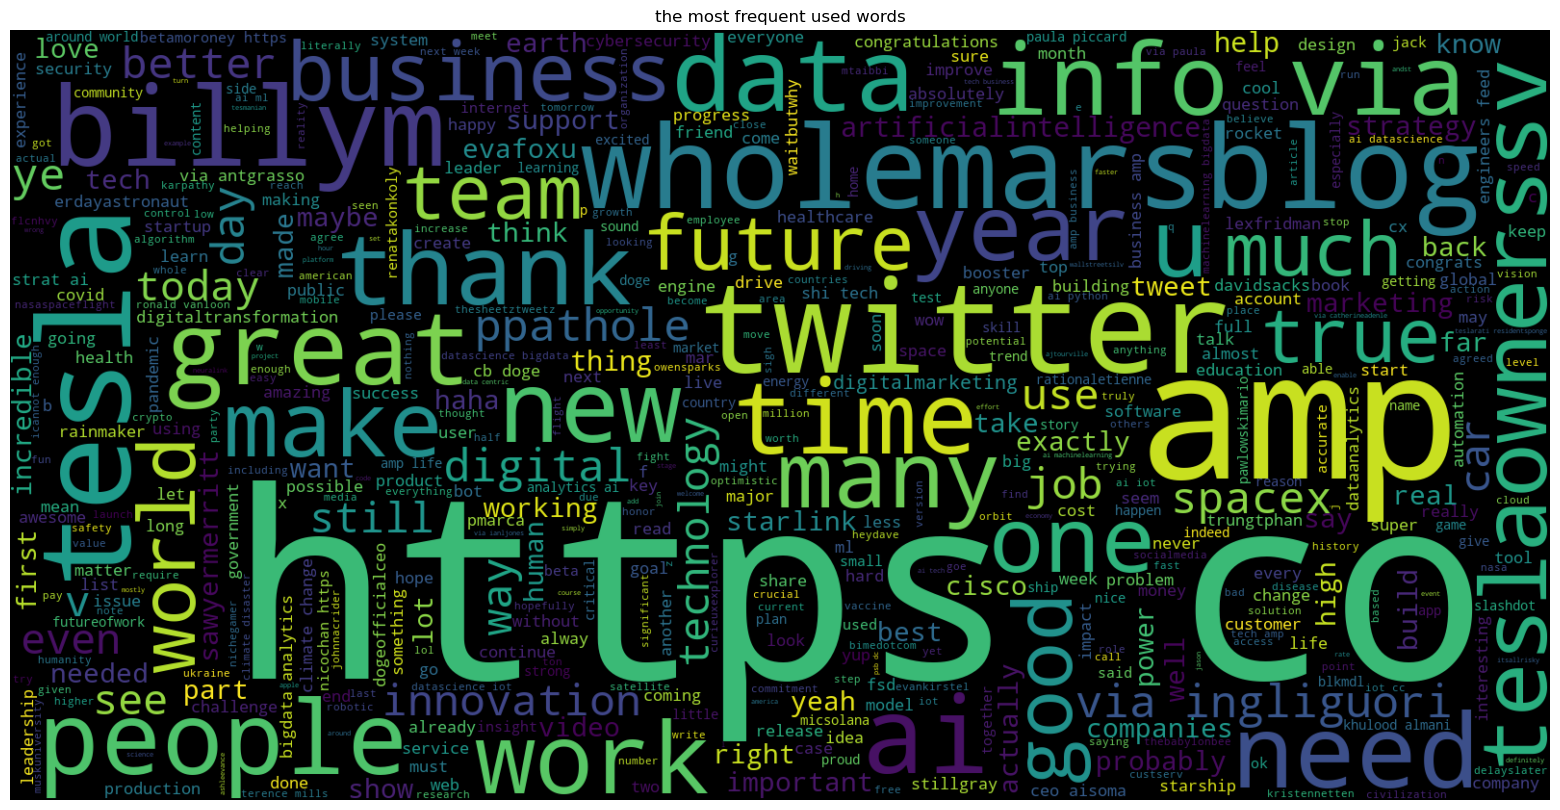

In [32]:
text = ' '.join(word for word in df['Text'])
plt.figure(figsize=(20,10),facecolor=None)
wordcloud = WordCloud(max_words=500,height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("the most frequent used words")
plt.show()

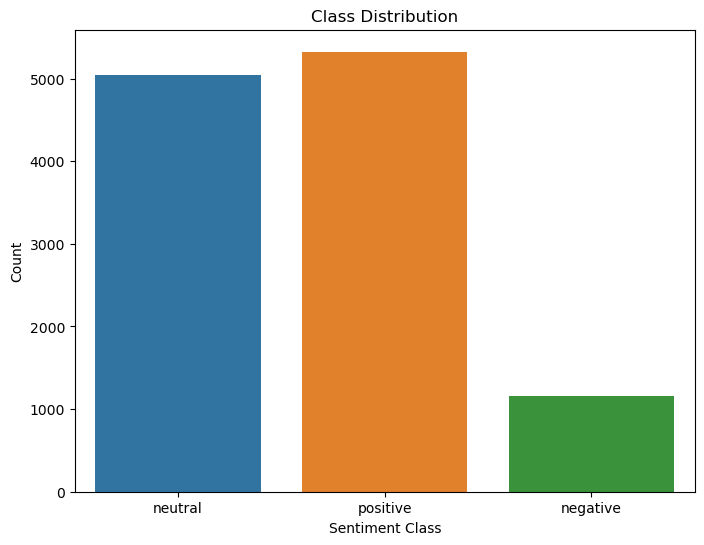

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

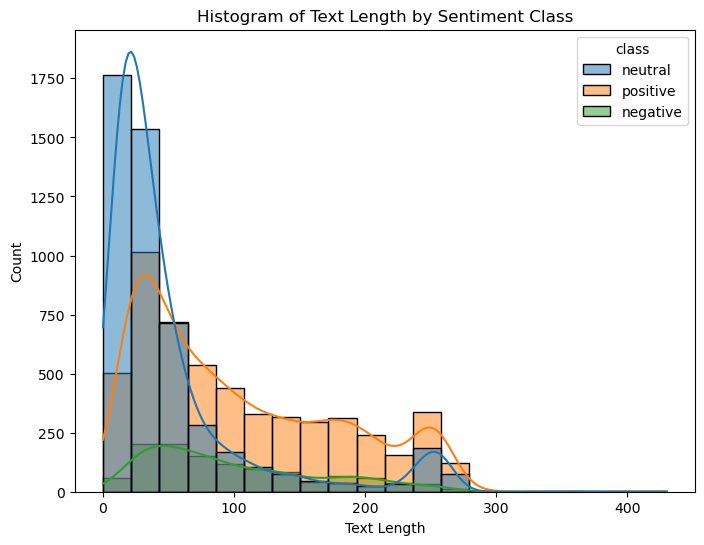

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x=df['Text'].apply(len), hue='class', bins=20, kde=True)
plt.title('Histogram of Text Length by Sentiment Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


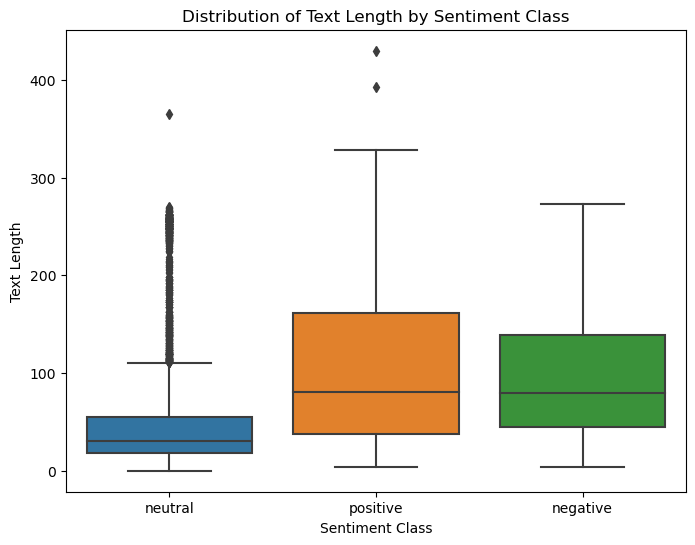

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y=df['Text'].apply(len), data=df)
plt.title('Distribution of Text Length by Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Text Length')
plt.show()


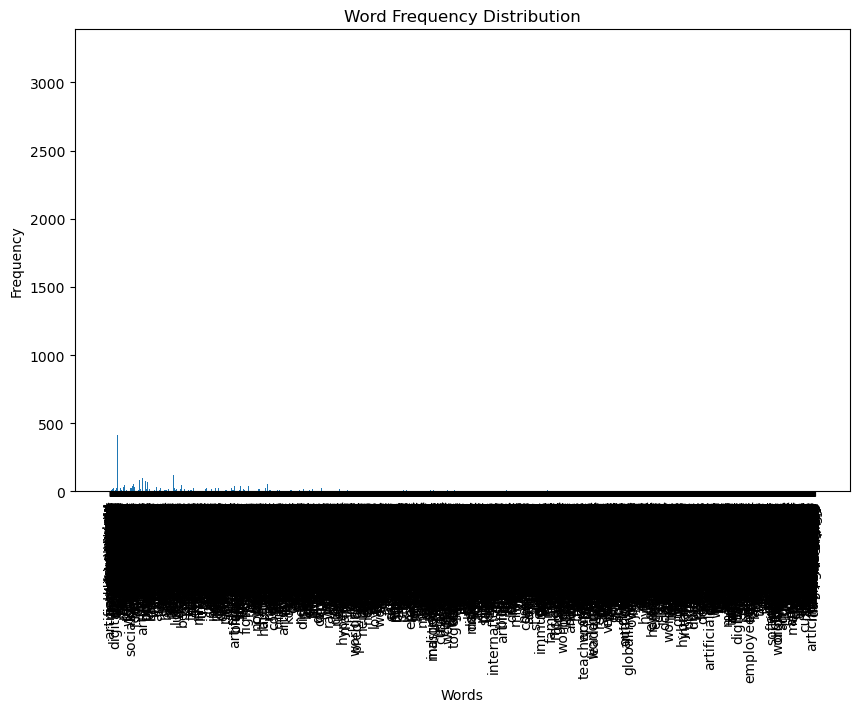

In [40]:
from collections import Counter

# Compute word frequencies for the entire dataset
words = " ".join(df['Text']).split()
word_freq = Counter(words)

plt.figure(figsize=(10, 6))
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()



In [45]:
file_path = r'C:\Users\dell\Downloads\cleaned_future_tweet.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# conclusion

Conclusion:

Our project embarked on a comprehensive journey through the realm of sentiment analysis, leveraging exploratory data analysis (EDA) techniques and powerful visualizations to unravel the intricate nuances of textual sentiment. Through meticulous examination of the dataset, we unearthed invaluable insights that illuminate the landscape of sentiment within our corpus.

Class Distribution Analysis: The distribution of sentiment classes was examined, revealing the prevalence of different sentiment categories within the dataset. This foundational analysis provided a baseline understanding of the sentiment distribution.


Text Length Exploration: Investigation into the lengths of text entries across sentiment classes unveiled intriguing patterns. Variations in text length were observed, offering insights into the complexity and depth of expression associated with different sentiments.


Word Cloud Visualization: Word clouds were generated for each sentiment class, visually encapsulating the most prominent words associated with each sentiment category. These visual representations offered a succinct portrayal of the lexical landscape underlying different sentiments.


Box Plots and Violin Plots: Distribution of text lengths across sentiment classes was further elucidated through box plots and violin plots. These graphical representations provided a holistic view of text length distributions, facilitating comparative analysis between sentiment categories.


Sentiment Trends Over Time: Time series analysis, where applicable, provided a temporal perspective on sentiment dynamics. By tracking sentiment distribution over time, we discerned temporal trends and fluctuations in sentiment expression.


Model Performance Comparison: Comparative analysis of model performance metrics enabled assessment of the efficacy of different sentiment analysis models. This critical evaluation shed light on the strengths and limitations of various modeling approaches.
Through these analytical endeavors, our project not only delved into the intricacies of sentiment within textual data but also laid the groundwork for informed decision-making and model optimization. The insights gleaned from our exploratory journey serve as a compass guiding future endeavors in sentiment analysis and text mining.

